<a href="https://colab.research.google.com/github/seohyun126/Kaggle_script/blob/main/TensorFlow_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 분류: 의류 이미지 분류
운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [2]:
# 10개의 범주와 70000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 이용
# 이미지는 해상도 28x28로 개별 옷 품목을 나타냄
fashion_mnist = tf.keras.datasets.fashion_mnist
# 여기서 60000개의 이미지를 사용하여 네트워크를 훈련하고 10000개의 이미지를 사용하여
# 네트워크에서 이미지 분류를 학습한 정도를 평가함
# 먼저 데이터 로드하기
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 클래스 이름을 출력할 별도의 변수 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels
# 각 레이블을 0과 9사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리

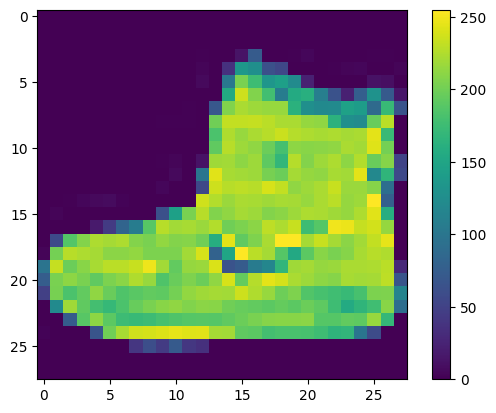

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# 픽셀값의 범위가 0-255 사이임

In [10]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0-1 사이로 조정
# 이렇게 하려면 255로 나눠야 하는데
# 훈련세트와 테스트 세트를 동일한 방식으로 전처리하기
train_images = train_images / 255.0
test_images = test_images / 255.0

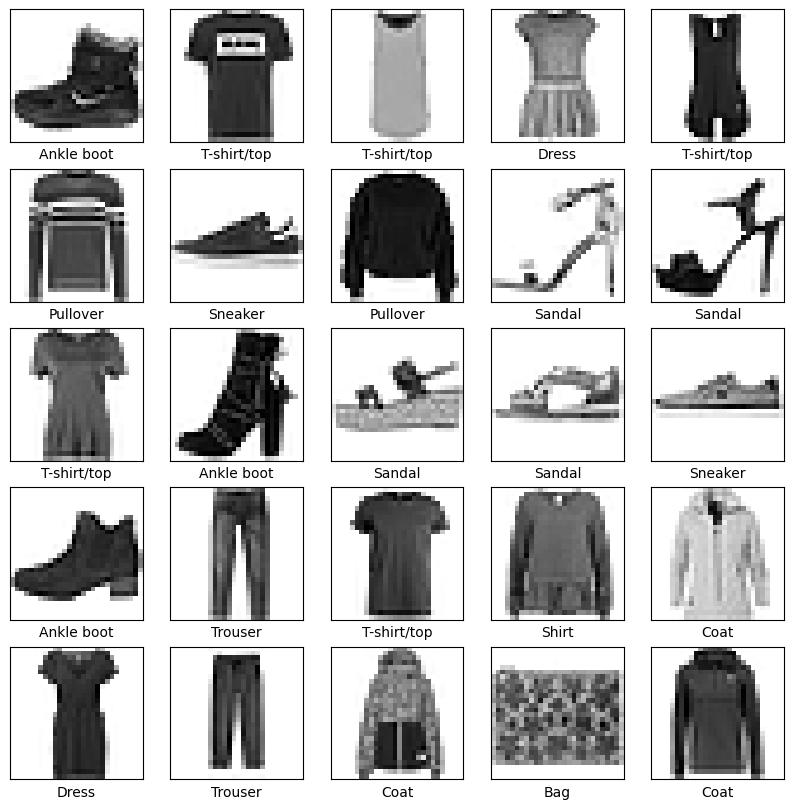

In [11]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력해보기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
신경망 모델을 만들기 위해 모델의 층을 구성한 다음 모델 컴파일 하기
## 층 설정
신경망의 기본 빌딩 블록은 레이어임. 레이어는 레이어에 공급된 데이터로부터 표현을 추출함.

In [13]:
model = tf.keras.Sequential([
    # 28*28=784 픽셀을 1차원으로 변환함. 이 층은 이미지에 있는 픽셀의 행렬을 펼쳐서 일렬로 늘림
    # 이 층엔 학습되는 가중치는 없고 데이터를 변환하기만 하면됨
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 층이 연속되어 연결됨. 이 층을 fully connected layer 라고 부름
    tf.keras.layers.Dense(128, activation='relu'),
    # 10개의 노드 softmax 층으로 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이 됨
    # 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함
    tf.keras.layers.Dense(10)
])

## 모델 컴파일

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
1. 훈련데이터를 모델에 주입. train_images와 train_labels 배열
2. 모델의 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦. 여기서는 test_images 배열로 이 예측이 test_labels 배열의 레이블과 맞는지 확인
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4983 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3762 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3377 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3138 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2968 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2800 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2675 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2581 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2471 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - lo

In [16]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3395 - accuracy: 0.8849 - 903ms/epoch - 3ms/step

Test accuracy: 0.8848999738693237


In [17]:
# 예측하기
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [18]:
predictions[0]

array([7.2315038e-09, 1.2383922e-09, 5.0719819e-09, 1.4237000e-11,
       1.3259648e-10, 2.5097004e-05, 9.1615632e-10, 8.5292058e-04,
       2.6554952e-09, 9.9912190e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])
# 레이블 확인

9

In [20]:
# 실제값 확인
test_labels[0]

9

In [21]:
# 10개의 클래스에 대한 예측을 모두 그래프로 표현해보기
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

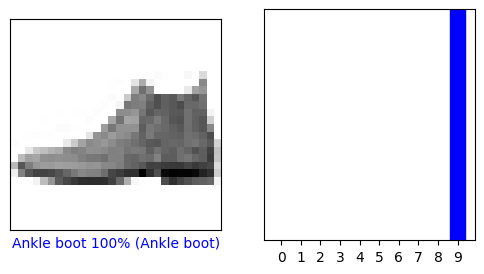

In [22]:
# 예측 확인
# 훈련된 모델을 사용하여 일부 이미지에 대한 예측 수행하기
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인하기
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

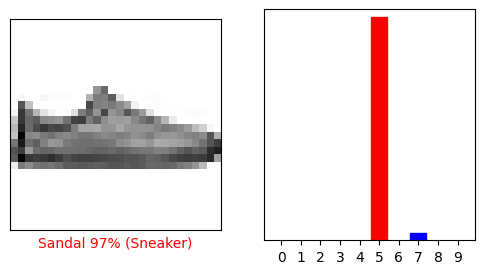

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

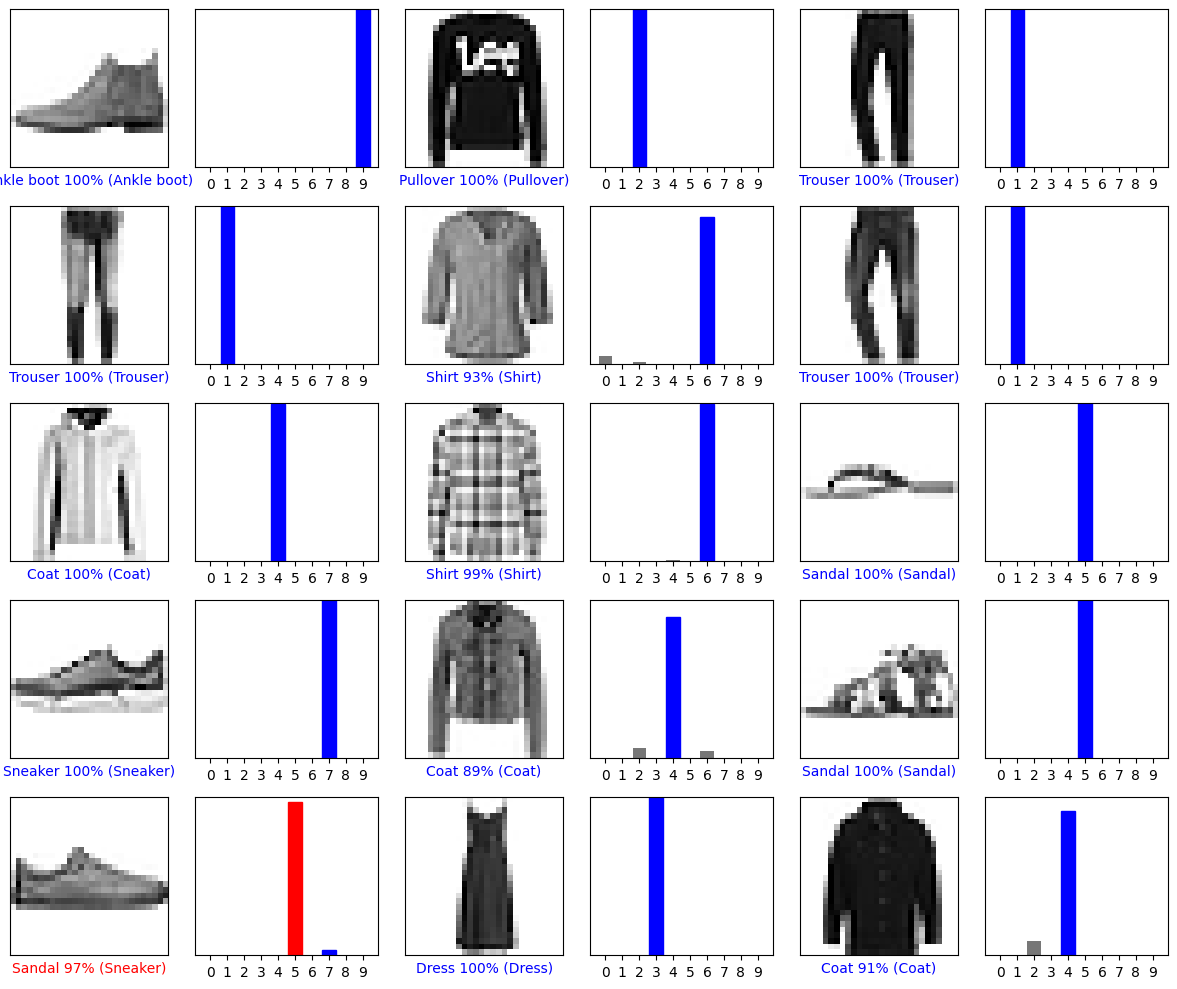

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
# 잘못 예측된 레이블은 붉은 색을 표시

## 훈련한 모델 사용하기
마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측 만들기

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
# 하나의 이미지를 사용할 때도 2차원 배열로 만들어야 함
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
# 이미지 예측 만들기
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[7.1014188e-06 2.2059911e-13 9.9915922e-01 6.1755427e-11 6.9374178e-04
  1.4689168e-11 1.3993501e-04 5.8114819e-16 1.8686926e-10 1.9309249e-15]]


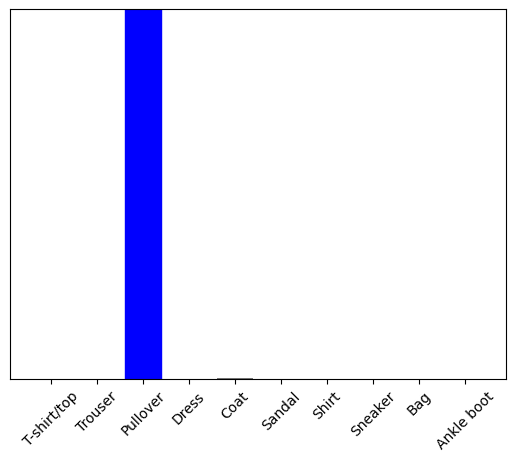

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2